In [2]:
import pandas as pd

maxMeetings = pd.read_csv('./data/maxMeetings.csv')

In [3]:
import numpy as np


class University:
    def __init__(self, code, name, availabilities: np.ndarray):
        self.code = code
        self.name = name
        self.availabilities = availabilities

    def is_available(self, day, time):
        return self.availabilities[day, time]

    def get_schedule(self, day):
        return self.availabilities[day]

    def get_all_schedules(self):
        return self.availabilities

    def __str__(self):
        return f'{self.code} - {self.name}'

    def __repr__(self):
        return f'{self.code} - {self.name}'

    def __eq__(self, other):
        return self.code == other.code

    def __hash__(self):
        return hash(self.code)




In [4]:
# Create a list of University objects
import json

universities = []
with open('./data/allAvailabilities.json') as f:
    data = json.load(f)
    for university_code in data:
        code = university_code
        name = data[university_code]['university']

        availabilities = np.array([data[university_code]['isAvailable'][day] for day in ['M', 'T', 'W', 'Th', 'F']])
        universities.append(University(code, name, availabilities))

universities

[M1 - University of Toronto,
 M2 - Toronto Metropolitan University,
 M3 - University of Michigan,
 M4 - École Polytechnique de Montréal,
 M5 - University of Guelph,
 M6 - University of Calgary,
 M7 - University of Prince Edward Island,
 M8 - University of Manitoba,
 M9 - National Research Council,
 M10 - Royal Military College of Canada,
 M11 - Dalhousie University,
 M12 - University of Windsor,
 M13 - Queen’s University,
 M14 - The University of Western Ontario,
 M15 - École Polytechnique de Montréal,
 M16 - Université du Québec en Abitibi-Témiscamingue,
 M17 - Université du Québec à Trois Rivieres,
 M18 - FPrimeC Solutions Inc.,
 M19 - Institut national de la recherche scientifique,
 M20 - Université du Québec à Chicoutimi,
 M21 - Université Catholique de Louvain,
 M22 - University of Northern British Columbia,
 M23 - University of Saskatchewan,
 M24 - University of Alberta,
 M25 - University of Waterloo,
 M26 - University of Alberta,
 M27 - Brock University,
 M28 - University of Cyp

In [5]:
def indices_to_list(indices, length):
    return [1 if i in indices else 0 for i in range(length+1)][1:]

In [6]:
import itertools
import numpy as np

# Assuming 40 participants, 5 days, and 34 time slots
availabilities = np.zeros((40, 5, 34), dtype=int)  # Initialize with integer type

# Loop through each university and assign its schedule to the matrix
for i in range(40):
    schedule = universities[i].get_all_schedules()
    # Reshape the schedule array to fit into the 3D matrix
    schedule_reshaped = np.reshape(schedule, (5, 34)).astype(int)  # Convert boolean to integer
    # Assign the reshaped schedule to the corresponding position in the matrix
    availabilities[i] = schedule_reshaped

# Open a file to write the combinations
with open('combinations.tsv', 'w') as file:
    file.truncate(0)
    file.write("Day\tTime\tMembers\tChairs\n")
    # Iterate through each time slot
    for day in range(availabilities.shape[1]):
        # Iterate through each day
        for time_slot in range(availabilities.shape[2]):
            # Get the availabilities for the current time slot and day
            participants_availabilities = availabilities[:, day, time_slot]

            # Find indices of free participants (where value is 0)
            free_participants_indices_0_29 = np.where(participants_availabilities[0:30] == 0)[0]
            free_participants_indices_30_39 = np.where(participants_availabilities[30:40] == 0)[0]

            # Find all combinations of 4 free participants from digits 0 to 29
            free_participants_combinations_0_29 = itertools.combinations(free_participants_indices_0_29, 5)

            # Find all combinations of 1 free participant from digits 30 to 39
            free_participants_combinations_30_39 = itertools.combinations(free_participants_indices_30_39, 1)

            # Combine combinations from both groups
            combined_combinations = itertools.product(free_participants_combinations_0_29, free_participants_combinations_30_39)
            
            # Write combinations to the file
            for combination in combined_combinations:
                file.write(f"{day+1}\t{time_slot+1}\t{combination[0]}\t{combination[1]}\n")


In [6]:
# 28 (duplicate removed) members X 34 time slots 
dedup_schedules = np.unique(schedule, axis=0)
print(dedup_schedules.shape)
dedup_schedules


(2, 34)


array([[False, False, False, False,  True, False, False, False, False,
        False, False, False, False,  True,  True, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False]])

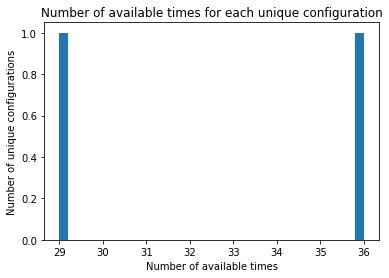

In [7]:
# Plot the number of ones in each row
import matplotlib.pyplot as plt

plt.hist(40 - np.sum(dedup_schedules, axis=1), bins=34)
plt.xlabel('Number of available times')
plt.ylabel('Number of unique configurations')
plt.title('Number of available times for each unique configuration')
plt.show()


In [8]:
# Find the number of ones in each unique configuration
num_ones = np.unique(34 - np.sum(dedup_schedules, axis=1), axis=0)
num_ones

array([23, 30])